## Library

In [1]:
import pandas as pd
import numpy as np
import sklearn

# Settings

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Visualization

In [2]:
from sklearn.tree import plot_tree
import sklearn.tree as tree
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Models

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier

from sklearn.naive_bayes import CategoricalNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

## Evaluation

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from sklearn.feature_selection import RFE


## Functions

In [4]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [29]:
def plot_correlation_heatmap(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(20, 10))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.8, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 20 / np.sqrt(len(corr))})

    plt.title('Correlation Heatmap')
    plt.show()

In [6]:
def clean_data(df):
    # Check for missing values
    print(df.isnull().sum())

    # Check for duplicates
    print(df.duplicated().sum())

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Impute missing values
    # df.fillna(df.median(), inplace=True)

    # Remove outliers
    # Q1 = df.quantile(0.25)
    # Q3 = df.quantile(0.75)
    # IQR = Q3 - Q1
    # df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

In [7]:
def get_numerical_features(df):
    """
    Returns a DataFrame containing only the numerical features of the input DataFrame.
    """
    print(df.select_dtypes(include=[float, int]).columns)
    return df.select_dtypes(include=[float, int])

In [8]:
def select_features(df, feature_list):
    """
    Returns a DataFrame containing only the selected features from the input DataFrame.
    """
    return df[feature_list]

In [9]:
def split_X_y(df, target_col):
    # Split dataframe into X and y
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    return X, y

In [10]:
def split_data(X, y, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [11]:
def plot_feature_importances(model, X_train):
    # Get absolute value of coefficients
    coefs = np.abs(model.coef_)
    
    # Normalize coefficients
    coefs /= np.sum(coefs)
    
    # Sort coefficients by importance
    sorted_idx = np.argsort(coefs)
    
    # Get feature names
    feature_names = X_train.columns.values
    
    plt.figure(figsize=(8, 5))
    # Plot horizontal bar chart of feature importances
    plt.barh(range(len(sorted_idx)), coefs[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    # set the tick label font size and other parameters
    plt.tick_params(axis='both', which='major', labelsize=6, length=6, width=2, direction='out', pad=8)

    plt.xlabel('Normalized Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

In [12]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

In [13]:
# Encode categorical variables

def encode_categorical_cols(df):
    # Identify categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    print("Categorical Variables:", categorical_cols)
    
    # Apply one-hot encoding
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(df[categorical_cols])
    #print(X_encoded)
    # Convert encoded features to a Pandas dataframe
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(categorical_cols),index=df.index)

    # Drop original categorical columns and merge with encoded features
    df_encoded=df.drop(categorical_cols, axis=1)
    df_encoded = pd.concat([df_encoded, X_encoded_df], axis=1)
    return df_encoded

In [14]:

# # Feature selection with RFE
# model=LinearRegression()
# rfe = RFE(model, n_features_to_select=5)
# rfe.fit(X_train, y_train)

# # Print the selected features and their ranking
# print("Selected Features:")
# for i in range(len(rfe.support_)):
#     if rfe.support_[i]:
#         print(X.columns[i])
        
# print("Feature Ranking:")
# print(rfe.ranking_)

In [15]:
def feature_selection_pvalue_train(X_train, y_train, cols):
    # Fit the OLS model
    
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()

    ## report model summary
    print(model.summary())
    
    # Get the p-values
    pvalues = model.pvalues[1:]

    print(pvalues.index)
    # Combine the p-values with the column names
    pvalues_df = pd.DataFrame({'feature': pvalues.index, 'pvalue': pvalues})

    # Filter out the columns with p-value > 0.05
    selected_features = list(pvalues_df[pvalues_df['pvalue'] < 0.05]['feature'])

    return selected_features


## Data Processing

In [16]:
data = pd.read_csv("./data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


* To drop columns:

In [23]:
data.columns.value_counts()

 Inventory Turnover Rate (times)                            1
 Operating Profit Rate                                      1
 Quick Asset Turnover Rate                                  1
 Cash Flow to Total Assets                                  1
 Current Asset Turnover Rate                                1
 Current Liabilities/Equity                                 1
 Quick Assets/Current Liability                             1
 Equity to Long-term Liability                              1
 Allocation rate per person                                 1
 Cash Flow to Liability                                     1
 Cash Flow to Equity                                        1
 Equity to Liability                                        1
 After-tax Net Profit Growth Rate                           1
 Net Value Per Share (A)                                    1
 Net profit before tax/Paid-in capital                      1
 Cash Reinvestment %                                        1
 Invento

In [31]:
# data.isnull().sum()
# no null >> will proceed

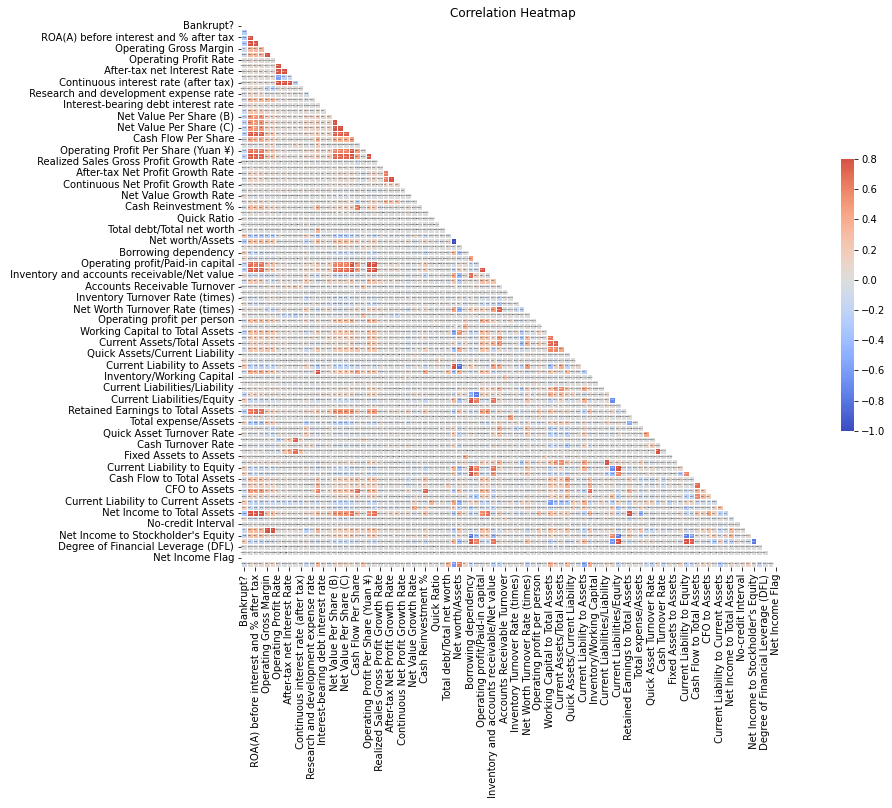

In [32]:
plot_correlation_heatmap(data)

In [34]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [43]:
X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

In [ ]:
rf = RandomForestClassifier()